# Chapter 3. Linear Systems and Elimination

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sympy import Matrix

%matplotlib widget

## 21. From Equations to Matrices (Augmenting and Encoding)

Let's look at a system of equations

$$
\begin{align}
2x + y &=8 \\
-3x + 4y &= -11
\end{align}
$$

In [3]:
A = np.array([
    [2, 1],
    [-3, 4]
])

b = np.array([8, -11])

print("Coefficient matrix A:\n", A)
print("Constants vector b:", b)

Coefficient matrix A:
 [[ 2  1]
 [-3  4]]
Constants vector b: [  8 -11]


System is $A \cdot x = b$

In [4]:
augmented = np.column_stack((A, b))
print("Augmented matrix:\n", augmented)

Augmented matrix:
 [[  2   1   8]
 [ -3   4 -11]]


In [5]:
solution = np.linalg.solve(A, b)
print("Solution (x,y):", solution)

Solution (x,y): [3.90909091 0.18181818]


## 22. Row Operations (legal moves that keep solns)

Three legal row ops:

1. swap two rows
2. multiple a row by a non-zero scalar
3. replace a row with itself pplus a multiple of another row

this part the book / lab absolutely botched the demo / walkthrough

## 23. Row-Echelon and Reduced Row-Echelon Forms (Target Shapes)

Our goal is to simplify the augemented matrix into a standard shape where the solutions are easy to read. 
    
These shapes are called:
* row-echelon form (REF)
* reduced row-echelon form (RREF)

In [8]:
from sympy import Matrix
M = Matrix([
    [1, 2, 1, 7],
    [2, 4, 1, 12],
    [3, 6, 2, 17]
])

M_rref = M.rref()
print("RREF form:\n", M_rref[0])

RREF form:
 Matrix([[1, 2, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])


If the RREF looks like

\begin{bmatrix}
1 & 0 & a & b \\
0 & 1 & c & d \\
0 & 0 & 0 & 0
\end{bmatrix}

* first two vars are leading (i.e. pivots)
* third var is free
* solutions can be written in terms of the free var

So basically:

* **ref organizes equations into a staircase shape**
* **rref goes further, making each pivot the only nonzero in its column**

**Row-Echelon Form (REF)**
A matrix is in row-echelon form if:

* All nonzero rows are above any rows of all zeros.
* In each nonzero row, the first nonzero entry (called the leading entry or pivot) is to the right of the leading entry of the row above it.
* All entries below a pivot are zero.

**Reduced Row-Echelon Form (RREF)**
A matrix is in reduced row-echelon form if, in addition to the rules of REF:

* Each pivot is equal to 1.
* Each pivot is the only nonzero entry in its column (everything above and below pivots is zero).

## 25. Solving Consistent Systems (Unique vs Infinite Solutions)

In [9]:
from sympy import Matrix

M = Matrix([
    [1, 1, 3],
    [2, -1, 0]
])

M_rref = M.rref()
print("RREF form:\n", M_rref[0])

# Split into coefficient matrix A and right-hand side b
A = M[:, :2]
b = M[:, 2]

solution = A.solve_least_squares(b)
print("Solution:", solution)

RREF form:
 Matrix([[1, 0, 1], [0, 1, 2]])
Solution: Matrix([[1], [2]])


In [10]:
M2 = Matrix([
    [1, 1, 1, 2],
    [2, 2, 2, 4]
])

M2_rref = M2.rref()
print("RREF form:\n", M2_rref[0])

RREF form:
 Matrix([[1, 1, 1, 2], [0, 0, 0, 0]])


First one has a unique solution, the second one has infinite solutions. 

## 26. Detecting Inconsistency (when no solution exists)

Basically inconsistent means that the equations contradict themseleves. We can visualize it like such:

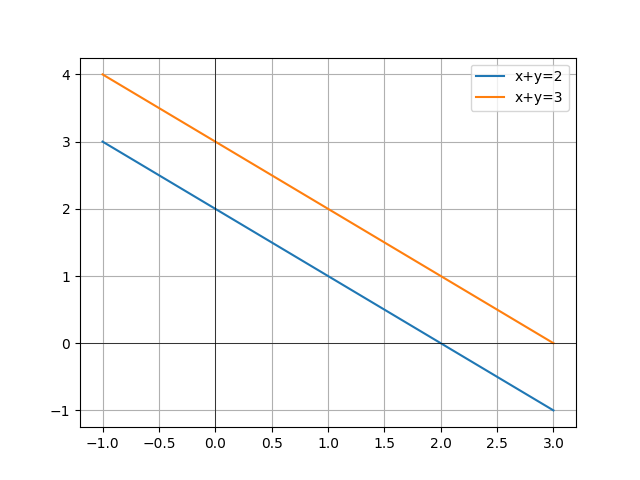

In [11]:
import matplotlib.pyplot as plt

x_vals = np.linspace(-1, 3, 100)
y1 = 2 - x_vals
y2 = 3 - x_vals

plt.plot(x_vals, y1, label="x+y=2")
plt.plot(x_vals, y2, label="x+y=3")

plt.legend()
plt.axhline(0,color='black',linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)
plt.grid()
plt.show()

Ok gonna breeze through this portion some because some of this is redundant / I don't think it's too relevant. 

## 29. Rank and Its First Meaning (Pivots as Information)

Rank of a matrix tells us how much independent information it contains. 

It's one of the most important concepts in linear algebra because it connects to pivots, independence, dimension, and number of solutions to a system. 

### Rank in Terms of Independence 

A set of vectors is linearly independent if none can be expressed as a combination of the others. 

* rank of a matrix tells us how many independent rows or columns it has
* if some columns are combination of others, they do not increase the rank

If $ \text{rank}(A) = \text{rank}(A | b ) $ the system is consistent 

If rank = num variables, system has unique solution. rank < num variables, infinitely many solutions. 


### Rank and Geometry
* rank 1 -> all information lies along a line
* rank 2 -> all inofrmation lies in a plane
* rank 3 -> fills 3d space

In $\mathbb{R}^3$, a matrix of rank 2 has columns spanning a plan through the origin. 


In [13]:
A = np.array([
    [1, 2, 3],
    [2, 4, 6],
    [3, 6, 9]
])
print("rank", np.linalg.matrix_rank(A))

rank 1


In [25]:
b_init = np.random.randn(4,4)
# print(b_init)
print(b_init.shape)
B = Matrix(b_init)
# print(B)
print(B.rank())

(4, 4)
4


## 30. LU Factorization (Elimination Captured as L and U)

Gaussian elimmn can be recorded in a neat factorization:

$$ A = LU $$

where $L$ is a lower triangular matrix and $U$ is an upper triangular matrix. This factorization is a powerful way for solving systems efficiently.

### What is LU Factorization?

If $A$ is an $n \times n $ matrix then $ A = LU $.

* $L$ is lower-triangular (entries below diagonal may be nonzero, diagonal entries = 1).
* $U$ is upper-triangular (entries above diagonal may be nonzero).

In [27]:
import numpy as np
from scipy.linalg import lu 

A = np.array([
    [2, 3, 1],
    [4, 7, 7],
    [6, 18, 22]
], dtype=float)

print("Matrix A:\n", A)

P, L, U = lu(A)

print("Permutation matrix P:\n", P)
print("Lower triangular L:\n", L)
print("Upper triangular U:\n", U)

Matrix A:
 [[ 2.  3.  1.]
 [ 4.  7.  7.]
 [ 6. 18. 22.]]
Permutation matrix P:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Lower triangular L:
 [[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 0.6        1.        ]]
Upper triangular U:
 [[ 6.         18.         22.        ]
 [ 0.         -5.         -7.66666667]
 [ 0.          0.         -1.73333333]]


### Pivoting and Permutations

Sometimes elimination requires row swaps. Then factorization is written as:

$$ P A = L U $$

where $P$ is a permutation matrix recording the row swaps. This is the practical form used in computing. 

In [31]:
import numpy as np
from scipy.linalg import lu 

A = np.array([
    [1, 2],
    [3, 8],
], dtype=float)

print("Matrix A:\n", A)

P, L, U = lu(A)

print("Permutation matrix P:\n", P)
print("Lower triangular L:\n", L)
print("Upper triangular U:\n", U)

Matrix A:
 [[1. 2.]
 [3. 8.]]
Permutation matrix P:
 [[0. 1.]
 [1. 0.]]
Lower triangular L:
 [[1.         0.        ]
 [0.33333333 1.        ]]
Upper triangular U:
 [[ 3.          8.        ]
 [ 0.         -0.66666667]]


In [32]:
reconstructed = P @ L @ U
print("Does P·L·U equal A?\n", np.allclose(reconstructed, A))

Does P·L·U equal A?
 True


In [29]:
U = np.array([
    [1,3],
    [0,2]
])
L = np.array([
    [1,0],
    [3,8]
])

R = L @ U
print(R)

[[ 1  3]
 [ 3 25]]


Faster way to solve this manually is:

Suppose $Ax = b$, if $A = LU$, then
1. solve $Ly = b$ by forwrad sub
2. solve $Ux = y$ by back substitution

Geometrically, LU decomp separates the elimination process into:

* $L$ - shear transformations (adding multiples of rows)
* $U$ - scaling and alignment into triangular form

### Why it matters

1. LU factorizatino comprresses elin into reusable format
2. cornerstone of numerical linear algebra
3. links computation with theory
4. introduces broader idea that matrices can be broken into simple interpretable parts

The numpy / scipy version basically computes:

$$ A = P \cdot L \cdot U $$

Allows for fast repeated solving of systems with different right-hand sides

LU decomposition is a core technique. 

